Le taux d'apprentissage dans l'entraînement des réseaux neuronaux est un hyperparamètre qui détermine la taille des pas effectués lors du processus d'optimisation. Il a un impact significatif sur la convergence et les performances du réseau neuronal pendant l'entraînement.

Effets du taux d'apprentissage :

1. **Vitesse de convergence** : Un taux d'apprentissage élevé peut conduire à une convergence plus rapide car il effectue des pas plus grands vers la perte minimale. Cependant, il pourrait dépasser le point optimal et échouer à converger. À l'inverse, un taux d'apprentissage très faible peut prendre beaucoup de temps pour converger en raison de petits pas.

2. **Stabilité de l'optimisation** : Un taux d'apprentissage trop élevé peut entraîner une instabilité, conduisant à des oscillations ou à une divergence de la fonction de perte. D'autre part, un taux d'apprentissage très faible pourrait rester coincé dans des minima locaux ou des points de selle.

3. **Généralisation et performances** : Le taux d'apprentissage peut influencer la capacité d'un réseau neuronal à généraliser à de nouvelles données non vues. Un taux d'apprentissage bien réglé conduit souvent à un modèle qui se comporte mieux à la fois sur les données d'entraînement et de validation/test.

Choix du taux d'apprentissage :

Il existe plusieurs méthodes pour déterminer un taux d'apprentissage approprié :

1. **Recherche par grille et validation croisée** : Essayez plusieurs taux d'apprentissage dans une grille et évaluez leurs performances à l'aide d'une validation croisée sur un jeu de données de validation. Choisissez le taux qui offre les meilleures performances.

2. **Programmateurs de taux d'apprentissage** : Les techniques telles que la décroissance du taux d'apprentissage ou les méthodes adaptatives (comme Adam, RMSprop) ajustent le taux d'apprentissage pendant l'entraînement en fonction de certains critères. Ces méthodes modifient dynamiquement le taux d'apprentissage, conduisant souvent à une meilleure convergence.

3. **Test de plage de taux d'apprentissage** : Utilisez des méthodes comme le test de plage de taux d'apprentissage, où le taux d'apprentissage commence très petit et augmente progressivement pendant quelques époques, en surveillant la perte. Cela aide à identifier un bon taux d'apprentissage initial.

4. **Politique à un cycle** : Cette méthode implique l'utilisation d'un calendrier de taux d'apprentissage cyclique où le taux d'apprentissage varie entre une valeur minimale et maximale de manière cyclique. Cela aide à une convergence plus rapide et une meilleure généralisation.

5. **Ajustement fin** : Commencez avec un taux d'apprentissage conservateur et augmentez ou diminuez progressivement en fonction des performances du réseau pendant l'entraînement.

En pratique, il n'existe pas de taux d'apprentissage universel. Cela dépend de l'architecture, de l'ensemble de données et du problème spécifique à résoudre. Des expérimentations et des ajustements itératifs sont souvent nécessaires pour trouver un taux d'apprentissage optimal qui équilibre la vitesse de convergence, la stabilité et les performances.

In [1]:
import numpy as np
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [2]:

device = "cuda" if torch.cuda.is_available() else "cpu"

data_folder = '~/data/FMNIST' # This can be any directory you want
# to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [5]:
# Define hyperparameters
input_size = 28 * 28  # Fashion MNIST image size
hidden_size = 1000
num_classes = 10



In [6]:
# Define hyperparameters
num_epochs = 10

criterion = nn.CrossEntropyLoss()


In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

In [8]:
# Initialisation des listes pour stocker les valeurs d'exactitude (accuracy)
valeurs_exactitude_train =  {u:[] for u in range(2)}
valeurs_exactitude_val = {u:[] for u in range(2)}

In [9]:
for train_idx,learning_rate in enumerate([0.1, 0.001]):

  # Define the transformation to apply to the dataset


  print('----------Learning Rate %f----------'%(learning_rate))







  # Initialize the model, loss function, and optimizer
  model = MLP(input_size, hidden_size, num_classes).cuda()
  optimizer = optim.Adam(model.parameters(),lr=learning_rate)

  # Entraînement du modèle
  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      correct_train = 0
      total_train = 0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          inputs, labels =inputs.cuda().float(), labels.cuda()
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total_train += labels.size(0)
          correct_train += (predicted == labels).sum().item()

      exactitude_train = 100 * correct_train / total_train
      valeurs_exactitude_train[train_idx].append(exactitude_train)

      # Validation
      model.eval()
      correct_val = 0
      total_val = 0
      with torch.no_grad():
          for data in testloader:
              images, labels = data
              images, labels =images.cuda().float(), labels.cuda()
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              total_val += labels.size(0)
              correct_val += (predicted == labels).sum().item()

      exactitude_val = 100 * correct_val / total_val
      valeurs_exactitude_val[train_idx].append(exactitude_val)

      print(f"Époque [{epoch+1}/{num_epochs}] - Perte : {running_loss / len(trainloader):.4f} - Exactitude Entraînement : {exactitude_train:.2f}% - Exactitude Validation : {exactitude_val:.2f}%")




----------Learning Rate 0.100000----------
Époque [1/10] - Perte : 3.2887 - Exactitude Entraînement : 35.73% - Exactitude Validation : 22.51%
Époque [2/10] - Perte : 1.7802 - Exactitude Entraînement : 28.80% - Exactitude Validation : 31.84%
Époque [3/10] - Perte : 1.7700 - Exactitude Entraînement : 29.45% - Exactitude Validation : 27.48%
Époque [4/10] - Perte : 1.7238 - Exactitude Entraînement : 30.93% - Exactitude Validation : 32.47%
Époque [5/10] - Perte : 1.7777 - Exactitude Entraînement : 30.36% - Exactitude Validation : 34.16%
Époque [6/10] - Perte : 1.8382 - Exactitude Entraînement : 28.71% - Exactitude Validation : 19.99%
Époque [7/10] - Perte : 2.0192 - Exactitude Entraînement : 23.79% - Exactitude Validation : 16.32%
Époque [8/10] - Perte : 2.1799 - Exactitude Entraînement : 16.01% - Exactitude Validation : 14.40%
Époque [9/10] - Perte : 2.1895 - Exactitude Entraînement : 15.21% - Exactitude Validation : 15.49%
Époque [10/10] - Perte : 2.1821 - Exactitude Entraînement : 15.84%

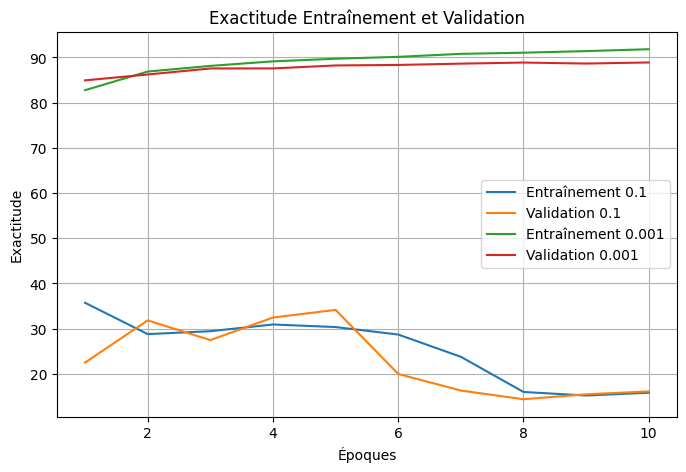

In [10]:
plt.figure(figsize=(8, 5))
for idx_u,u in enumerate(['0.1','0.001']):
  # Tracé de l'exactitude à chaque époque pour les ensembles d'entraînement et de validation

  plt.plot(range(1, num_epochs + 1), valeurs_exactitude_train[idx_u], label='Entraînement '+u)
  plt.plot(range(1, num_epochs + 1), valeurs_exactitude_val[idx_u], label='Validation '+u)
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.title('Exactitude Entraînement et Validation')
plt.legend()
plt.grid(True)
plt.show()